In [2]:
import nibabel as nib
import numpy as np
from scipy.ndimage import zoom
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import pearsonr

In [3]:
conda update python

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/global/anaconda37

  added / updated specs:
    - python


The following packages will be UPDATED:

  openssl                                 1.1.1v-h7f8727e_0 --> 1.1.1w-h7f8727e_0


Preparing transaction: done
Verifying transaction: failed

EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: /home/global/anaconda37
  uid: 2054
  gid: 500



Note: you may need to restart the kernel to use updated packages.


In [4]:
conda update -n base -c defaults conda

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/global/anaconda37

  added / updated specs:
    - conda


The following packages will be UPDATED:

  openssl                                 1.1.1v-h7f8727e_0 --> 1.1.1w-h7f8727e_0


Preparing transaction: done
Verifying transaction: failed

EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: /home/global/anaconda37
  uid: 2054
  gid: 500



Note: you may need to restart the kernel to use updated packages.


In [5]:
import sys
sys.version

'3.7.6 | packaged by conda-forge | (default, Jan  7 2020, 22:33:48) \n[GCC 7.3.0]'

In [1]:
import intensity_normalization

ModuleNotFoundError: No module named 'intensity_normalization'

In [8]:
conda install intensity-normalization

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - intensity-normalization

Current channels:

  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [42]:
from intensity_normalization.normalize.fcm import FCMNormalize

ModuleNotFoundError: No module named 'intensity_normalization'

In [39]:
!pip3 install intensity-normalization

Defaulting to user installation because normal site-packages is not writeable
ERROR: Ignored the following versions that require a different python version: 2.2.0 Requires-Python !=3.10.*,!=3.11.*,>=3.9; 2.2.1 Requires-Python !=3.10.*,!=3.11.*,>=3.9; 2.2.2 Requires-Python !=3.10.*,!=3.11.*,>=3.9; 2.2.3 Requires-Python !=3.10.*,!=3.11.*,>=3.9; 2.2.4 Requires-Python >=3.9
ERROR: Could not find a version that satisfies the requirement intensity-normalization (from versions: 1.4.4, 1.4.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4)
ERROR: No matching distribution found for intensity-normalization


In [1]:
pip install intensity-normalization

Defaulting to user installation because normal site-packages is not writeable
ERROR: Ignored the following versions that require a different python version: 2.2.0 Requires-Python !=3.10.*,!=3.11.*,>=3.9; 2.2.1 Requires-Python !=3.10.*,!=3.11.*,>=3.9; 2.2.2 Requires-Python !=3.10.*,!=3.11.*,>=3.9; 2.2.3 Requires-Python !=3.10.*,!=3.11.*,>=3.9; 2.2.4 Requires-Python >=3.9
ERROR: Could not find a version that satisfies the requirement intensity-normalization (from versions: 1.4.4, 1.4.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4)
ERROR: No matching distribution found for intensity-normalization
Note: you may need to restart the kernel to use updated packages.


In [4]:
python --version

NameError: name 'python' is not defined

In [5]:
python -m pip install --upgrade pip

SyntaxError: invalid syntax (629497118.py, line 1)

In [10]:
image_brain1="/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Brains/CHU/Pat8_T1Gado_CHU_brain.nii.gz"
image_brain2="/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Brains_Registered/COL_registred_on_CHU/Pat8_COL_registered.nii.gz"
image_mask1= "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Before_prettt_mask/CHU/Pat8_T1Gado_CHU_bet_mask.nii.gz"
image_mask2= "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Masks_Registered/COL_mask_registred/Pat8_COL_mask_registered.nii.gz"

In [21]:
def bland_altman_plot_final(data1, data2, maskfile):
    
    downsample_factor=25
    
    image1 = nib.load(data1).get_fdata()[::downsample_factor,::downsample_factor,::downsample_factor]
    image2 = nib.load(data2).get_fdata()[::downsample_factor,::downsample_factor,::downsample_factor]
    mask = nib.load(maskfile).get_fdata()[::downsample_factor,::downsample_factor,::downsample_factor]
    
    mean = (image1 + image2) / 2
    diff = image1 - image2

    mean_diff = np.mean(diff[mask>0])
    std_diff = np.std(diff[mask>0], ddof=1)
    lower_limit = mean_diff - 1.96 * std_diff
    upper_limit = mean_diff + 1.96 * std_diff

    plt.figure(figsize=(8, 6))
    plt.scatter(mean[mask>0], diff[mask>0], c='b', alpha=0.5, s=30)
    plt.axhline(mean_diff, color='red', linestyle='--', linewidth=2)
    plt.axhline(lower_limit, color='green', linestyle='--', linewidth=1)
    plt.axhline(upper_limit, color='green', linestyle='--', linewidth=1)
    plt.xlabel('Moyenne des deux mesures')
    plt.ylabel('Différence entre les mesures')
    plt.title('Bland-Altman Plot')
    plt.grid(True)

    plt.show()
    
    points_within_limits = np.sum((diff[mask>0] >= lower_limit) & (diff[mask>0] <= upper_limit))
    all_points = np.sum(mask>0)

    return print(f"Number of points within Bland-Altman limits: {points_within_limits} / {all_points}")

In [23]:
def pearson_correlation(data1, data2, maskfile, downsample_factor=25):

    image1 = nib.load(data1).get_fdata()[::downsample_factor, ::downsample_factor, ::downsample_factor]
    image2 = nib.load(data2).get_fdata()[::downsample_factor, ::downsample_factor, ::downsample_factor]
    mask = nib.load(maskfile).get_fdata()[::downsample_factor, ::downsample_factor, ::downsample_factor]

    image1_mask = image1[mask > 0]
    image2_mask = image2[mask > 0]

    correlation_coefficient, _ = pearsonr(image1_mask, image2_mask)

    return correlation_coefficient

In [17]:
def fcm_tissue_based_normalization(brain_image_path, mask_image_path, num_clusters=3):
    brain_image = nib.load(brain_image_path).get_fdata()
    mask_image = nib.load(mask_image_path).get_fdata()

    brain_image_masked = brain_image * mask_image

    # Reshape the masked brain image into a 1D array
    brain_image_1d = brain_image_masked[mask_image > 0].reshape(-1, 1)

    # Apply PCA to reduce the dimensionality
    pca = PCA(n_components=1)
    pca_result = pca.fit_transform(brain_image_1d)

    # Apply FCM clustering to the PCA result
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(pca_result)
    cluster_centers = kmeans.cluster_centers_

    # Normalize the brain image based on cluster centers
    normalized_image = np.zeros_like(brain_image)
    for i in range(num_clusters):
        cluster_mask = kmeans.labels_ == i
        cluster_mean = np.mean(brain_image_1d[cluster_mask])  # Calculate mean within cluster
        normalized_image[mask_image > 0] += cluster_mask * (brain_image[mask_image > 0] - cluster_mean)

    # Create a new NIfTI image with the normalized values
    normalized_image_nifti = nib.Nifti1Image(normalized_image, affine=nib.load(brain_image_path).affine)

    return normalized_image_nifti


In [33]:
normalized_image1 = fcm_tissue_based_normalization(image_brain1, image_mask1)
normalized_image2 = fcm_tissue_based_normalization(image_brain2, image_mask2)

In [34]:
nib.save(normalized_image1, "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Trash/fcm_normalized_image_8.nii.gz")
nib.save(normalized_image2, "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Trash/fcm_normalized_image2_8.nii.gz")

In [35]:
normalized_image1 = "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Trash/fcm_normalized_image_8.nii.gz"
normalized_image2 = "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Trash/fcm_normalized_image2_8.nii.gz"

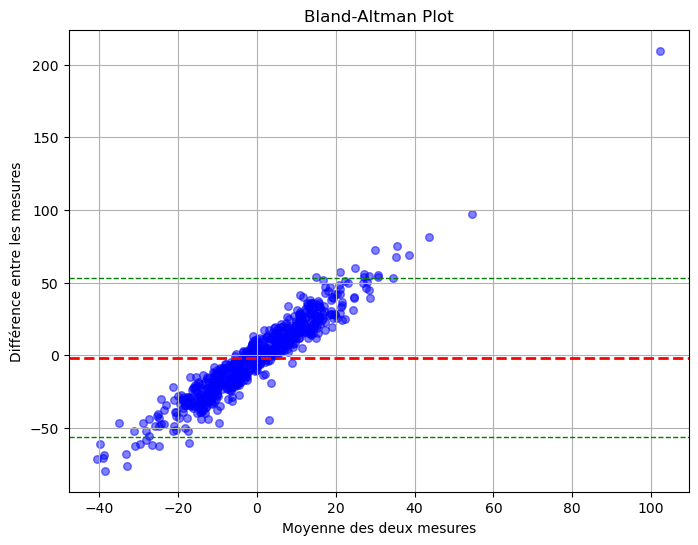

Number of points within Bland-Altman limits: 631 / 660


In [36]:
bland_altman_plot_final(normalized_image1, normalized_image2, image_mask1)

In [37]:
print("Pearson Correlation Coefficient :", pearson_correlation(normalized_image1, normalized_image2, image_mask1))

Pearson Correlation Coefficient : 0.05214496999842029
